# **Aerofit Business Case Study**



---

# **1] Exploratory Data Analysis**


---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2024-07-06 18:57:12--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.239.15.217, 18.239.15.40, 18.239.15.11, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.239.15.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-07-06 18:57:13 (2.06 GB/s) - ‘aerofit_treadmill.csv?1639992749’ saved [7279/7279]



**Loading the data frame**

In [ ]:
df = pd.read_csv("aerofit_treadmill.csv?1639992749")

**To display top 5 rows**

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


**To check the number of rows and columns**

In [ ]:
df.shape

(180, 9)

Insights:

* Number of rows: 180

* Number of columns: 9

**To find the data type of all columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Insights:



*   Product, Gender, Marital status are object(string)
*   Age, Education, usage, fitness, income, miles are int64(integer)



**Finding the missing values and finding the number of missing values in each column**

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<Axes: >

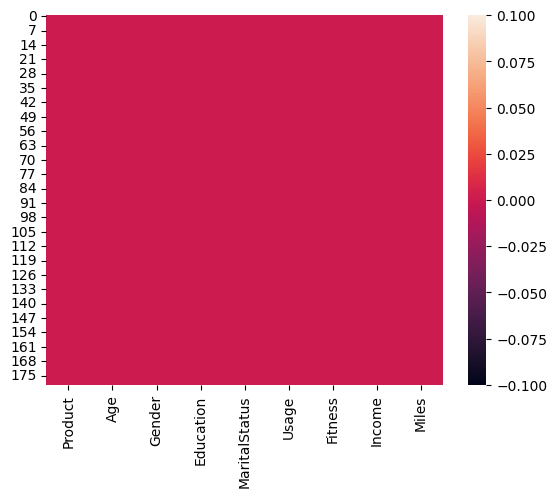

In [ ]:
sns.heatmap(df.isnull())

Insights:

  The dataset doesn't contain any missing values

In [ ]:
df.duplicated().value_counts()

False    180
Name: count, dtype: int64

Insights:

  The dataset doesn't contain any duplicate values

**Analysing basic metrics**

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


Insights:

* Total count of all columns is 180
* Age: Mean age of the customer is 28 years, half of the customer's mean age is 26.
* Education: Mean Education is 15 with maximum as 21 and minimum as 12.
* Usage: Mean Usage per week is 3.4, with maximum as 7 and minimum as 2.
* Fitness: Average rating is 3.3 on a scale of 1 to 5.
* Miles: Average number of miles the customer walks is 103 with maximum distance travelled by most
people is almost 115 and minimum is 21.
* Income (in $): Most customer earns around 58K annually, with maximum of 104K and minimum almost
30K


In [ ]:
df["MaritalStatus"].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [ ]:
df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

Insights:

In dataset we have 104 male and 76 female



---


# **2] Detecting the Outliers**

---



Finding the outliers for every continuous variable in the
dataset

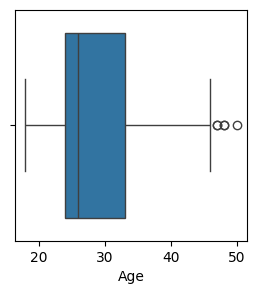

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df,x='Age')
plt.show()

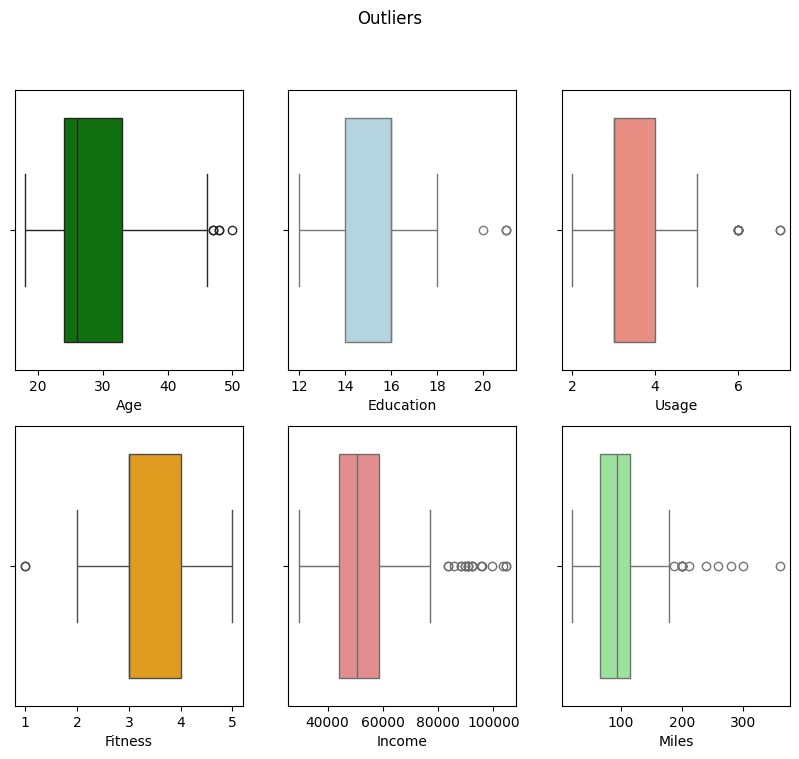

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(10,8))
sns.boxplot(data=df, x='Age',color='g',ax=ax[0,0])
sns.boxplot(data=df, x='Education', color='lightblue', ax=ax[0,1])
sns.boxplot(data=df, x='Usage', color='salmon', ax=ax[0,2])
sns.boxplot(data=df, x='Fitness', color='orange', ax=ax[1,0])
sns.boxplot(data=df, x='Income', color='lightcoral', ax=ax[1,1])
sns.boxplot(data=df, x='Miles', color='lightgreen', ax=ax[1,2])
fig.suptitle('Outliers')
plt.show()

Insights:

Other than Income and Miles variables have relatively lower presence of outliers.

 **Remove/clip the data between the 5 percentile and 95
percentile**

In [ ]:
remove_Age = np.clip(df['Age'], np.percentile(df['Age'],5), np.percentile(df['Age'],95))
remove_Education= np.clip(df['Education'], np.percentile(df['Education'],5), np.percentile(df['Education'],95))
remove_Usage= np.clip(df['Usage'], np.percentile(df['Usage'],5), np.percentile(df['Usage'],95))
remove_Fitness= np.clip(df['Fitness'], np.percentile(df['Fitness'],5), np.percentile(df['Fitness'],95))
remove_Income= np.clip(df['Income'], np.percentile(df['Income'],5), np.percentile(df['Income'],95))
remove_Miles= np.clip(df['Miles'], np.percentile(df['Miles'],5), np.percentile(df['Miles'],95))

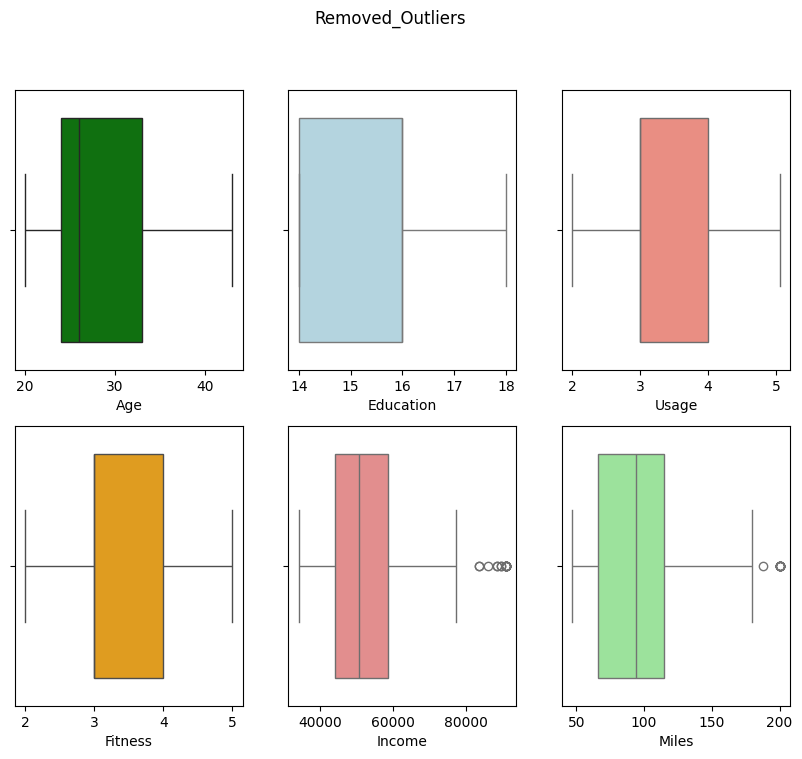

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(10,8))
sns.boxplot(data=df, x=remove_Age,color='g',ax=ax[0,0])
sns.boxplot(data=df, x=remove_Education, color='lightblue', ax=ax[0,1])
sns.boxplot(data=df, x=remove_Usage, color='salmon', ax=ax[0,2])
sns.boxplot(data=df, x=remove_Fitness, color='orange', ax=ax[1,0])
sns.boxplot(data=df, x=remove_Income, color='lightcoral', ax=ax[1,1])
sns.boxplot(data=df, x=remove_Miles, color='lightgreen', ax=ax[1,2])
fig.suptitle('Removed_Outliers')
plt.show()

Insights:

Clearly we can see that data has been removed between the 5 percentile and 95 percentile.



---


# **3.** **Check if features like marital status, Gender, and age have any effect on the product purchased**


---


Find if there is any relationship between the categorical
variables and the output variable in the data.


## **Univariate Analysis**

In [ ]:
df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

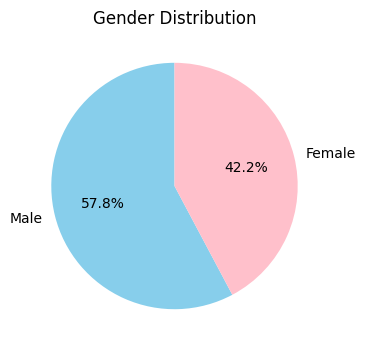

In [ ]:
plt.figure(figsize = (4, 4))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, startangle = 90, autopct='%1.1f%%', colors = ("Skyblue", "Pink"))
plt.title('Gender Distribution')
plt.show()

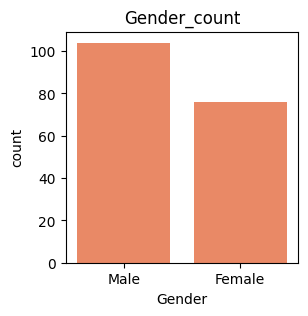

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=df,x='Gender', color = "coral")
plt.title('Gender_count')
plt.show()

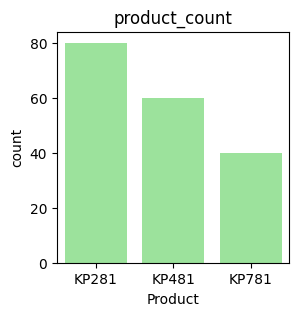

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=df,x='Product', color = "lightgreen")
plt.title('product_count')
plt.show()

Text(0.5, 1.0, 'MaritalStatus Distribution')

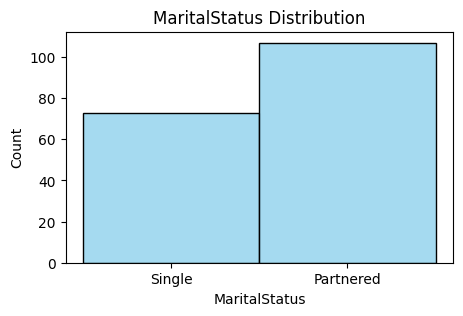

In [ ]:
plt.figure(figsize = (5, 3))
sns.histplot(df["MaritalStatus"], color = "skyblue")
plt.title("MaritalStatus Distribution")

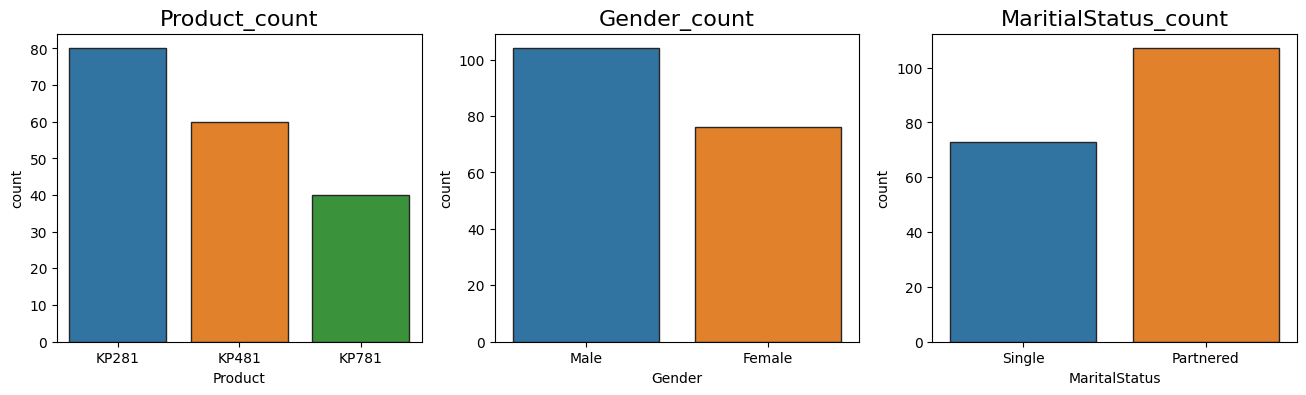

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(16,4))
sns.countplot(data=df,x='Product',ax=ax[0],hue='Product',edgecolor="0.15")
sns.countplot(data=df,x='Gender',ax=ax[1],hue='Gender',edgecolor="0.15")
sns.countplot(data=df,x='MaritalStatus',ax=ax[2],hue='MaritalStatus',edgecolor="0.15")
ax[0].set_title('Product_count',fontsize=16)
ax[1].set_title('Gender_count',fontsize=16)
ax[2].set_title('MaritialStatus_count',fontsize=16)
plt.show()

Insights:

1. Most frequent Purchased product is KP281.
2. No of male is higher than female.
3. Partnered persons are more.

In [ ]:
df["Fitness"].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

<ipython-input-62-2d1d88511bee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = "Fitness", palette = "flare_r", width = 0.5)


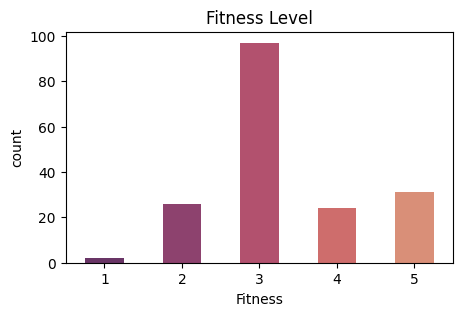

In [ ]:
plt.figure(figsize = (5, 3))
sns.countplot(data = df, x = "Fitness", palette = "flare_r", width = 0.5)
plt.title("Fitness Level")
plt.show()

Insights:
1. Most of them belongs to the Fitness level 3

## **Bivariate Analysis**

## **Product vs Gender**

In [ ]:
# non graphical
df[["Product", "Gender"]].value_counts().unstack()

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


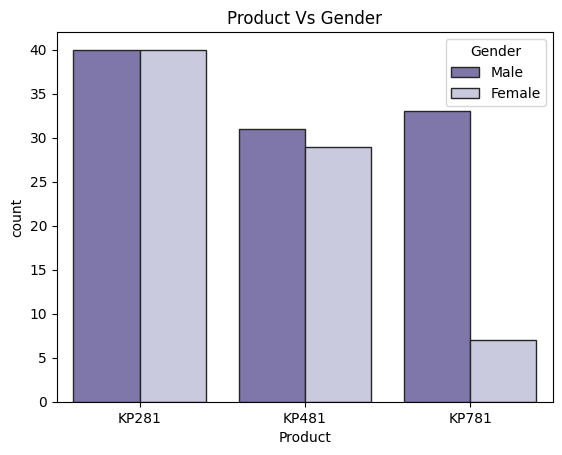

In [ ]:
# graphical
sns.countplot(data = df, x = "Product", hue = "Gender", palette='Purples_r', edgecolor="0.15")
plt.title("Product Vs Gender")
plt.show()

insights: (Product vs Gender)
1. The product have purchased by same number of male and female.
2. Most of the male custmors have purchased KP781 product.


## **Fitness Vs Gender**

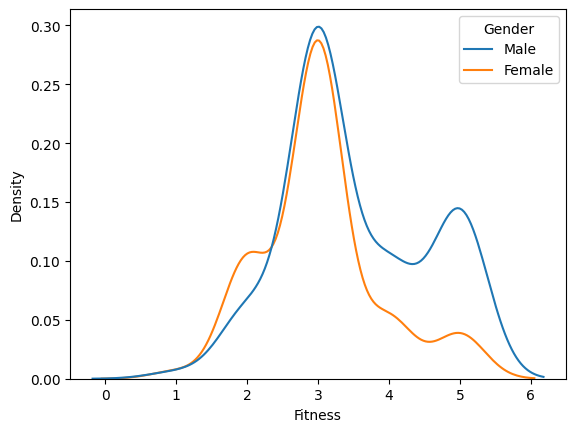

In [ ]:
sns.kdeplot(data=df, x='Fitness', hue='Gender')
plt.show()

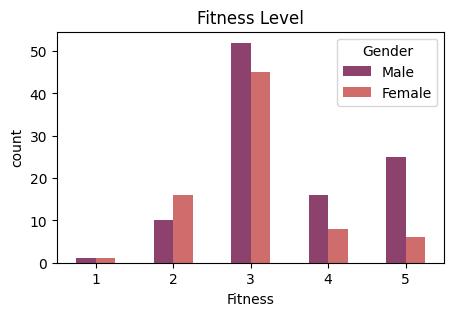

In [ ]:
plt.figure(figsize = (5, 3))
sns.countplot(data = df, x = "Fitness", hue = "Gender", palette = "flare_r", width = 0.5)
plt.title("Fitness Level")
plt.show()

Insights:
1. Most of them belongs to the Fitness level 3
2. Males are more involved in fitness level as compared to Females

## **Income Vs Gender**

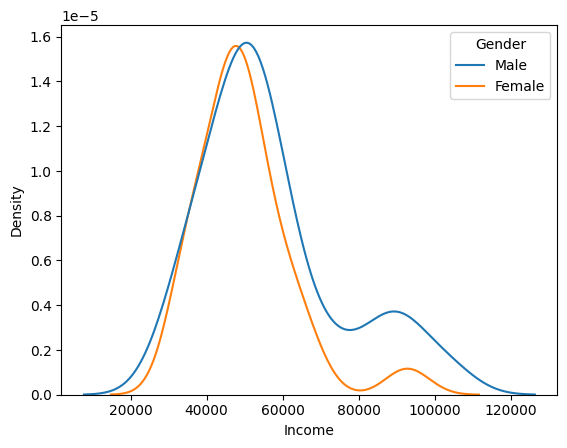

In [ ]:
sns.kdeplot(data=df, x='Income', hue='Gender')
plt.show()

Insights:
1. Peek Income of both genders are roughly same i.e., between 40K - 70K.
2. Majority of the males have annual salary more than 75K, while few female have the same.
3. Distribution of salary less 30K is same in both genders

## **Product Vs MaritalStatus**

In [ ]:
# non graphical
df[["Product", "MaritalStatus"]].value_counts().unstack()

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


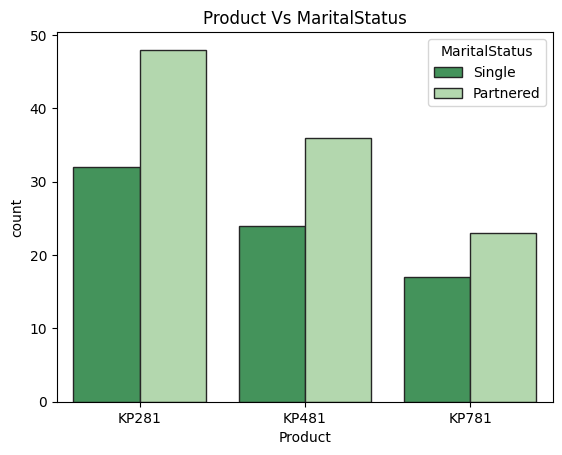

In [ ]:
# graphical
sns.countplot(data = df, x = "Product", hue = "MaritalStatus", palette='Greens_r', edgecolor="0.15")
plt.title("Product Vs MaritalStatus")
plt.show()

<Figure size 1000x500 with 0 Axes>

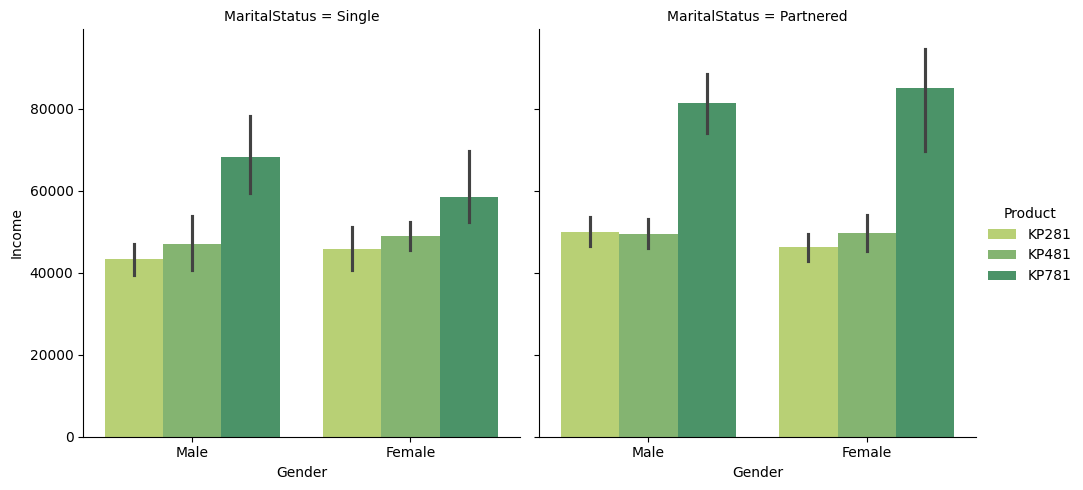

In [ ]:
plt.figure(figsize = (10, 5))
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=df, kind='bar', palette='summer_r')
plt.show()

Insights:
(Product vs MaritalStatus)
1. All three products have purchased by partnered customer.Partnered Female bought KP781 treadmill compared to Partnered Male.
2. Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
3. Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
4. There are more single Males buying treadmill than single Females.
5. Single Male customers bought KP781 treadmill compared to single Female.
6. Distribution of KP481 in Single & Parterned, Male & Female is same.
7. Partnered customers are more than Single customers.

 **Find if there is any relationship between the continuous
variables and the output variable in the data.**

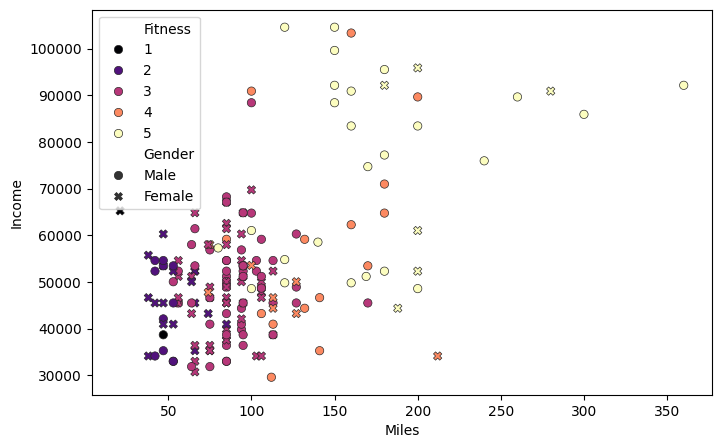

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Miles',y='Income',data=df,hue='Fitness',style='Gender', palette='magma', edgecolor="0.15")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Insights:
1. Most of the customers fitness level is 3 and 5.
2. some customrs have fitness level 5 and which shows that they cover maximum miles.


---
# **4. Representing the Probability**
---


**Find the marginal probability (what percent of customers
 have purchased KP281, KP481, or KP781)**

**Categorizing all continuous variable into related categories**

In [ ]:
Age_bin = [17,25,35,45,60]
Age_labels=['Young Adults', 'Adults', 'Middle-Aged Adults', 'Elder']
df['Age_group']=pd.cut( df['Age'], bins=Age_bin, labels=Age_labels )

Edu_bin = [0,12,15,22]
Edu_labels=['Primary','Secondary','Higher']
df['Edu_group']=pd.cut(df['Education'],bins=Edu_bin,labels=Edu_labels)

Income_bin=[0,40000,60000,80000,200000]
Income_labels=['Low','Modrate','High','Very high']
df['Income_group']=pd.cut(df['Income'], bins=Income_bin, labels=Income_labels)

Miles_bins = [0, 50, 100, 200, 400]
Miles_labels = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast']
df['Miles_group'] = pd.cut(df['Miles'], bins=Miles_bins, labels=Miles_labels)


**1] Probability of product purchased with respect to Gender**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['Gender'], margins = True, normalize = True).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


 Insights:

 * For product KP281, 22% of purchases are made by females, 22% by males, and in total, it represents
 44% of all purchases.
 * Similarly, for product KP481, 16% of purchases are made by females, 17% by males, and in total, it
 represents 33% of all purchases.
 * And for product KP781, 4% of purchases are made by females, 18% by males, and in total, it
 represents 22% of all purchases.
 * The last row and column provide the overall distribution of purchases among genders

**2] Probability of product purchased with respect to Age group**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['Age_group'], margins = True, normalize = True).round(2)

Age_group,Young Adults,Adults,Middle-Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


 Insights:
 * For product KP281
  * 19% of purchases are made by Young Adults, 18% by Adults, 6% by Middle-Aged adults, and 2% by Elders, totaling to 44% of all purchases.

* For product KP481
  * 16% of purchases are made by Young Adults, 13% by Adults, 4% by Middle-Aged adults, and 1% by Elders, totaling to 33% of all purchases.

* For product KP781
 * 9% of purchases are made by Young Adults,
 9% by adults, 2% by Middle-Aged adults, and 1% by Elders, totaling to 22% of all purchases.

 The last row and column provide the overall distribution of purchases among different age groups

**3] Probability of product purchased with respect to Education**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['Edu_group'], margins = True, normalize = True).round(2)

Edu_group,Primary,Secondary,Higher,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


Insights:
 1. Customers with Higher Education (Above 15 Years) have a 62% probability of purchasing a treadmill.
 The conditional probabilities for each treadmill model given Higher Education are:
 * KP281: 23%
 * KP481: 18%
 * KP781: 21%
 2. Customers with Secondary Education (13-15 yrs) show a 36% probability of purchasing a treadmill.
 The conditional probabilities for each treadmill model given Secondary Education are:
 * KP281: 21%
 * KP481: 14%
 * KP781: 1%

 3. Customers with Primary Education (Below 15 Years) show a 2% probability of purchasing a treadmill.
 The conditional probabilities for each treadmill model given Secondary Education are:
 * KP281: 1%
 * KP481: 1%
 * KP781: 0%

**4] Probability of product purchased with respect to Income group**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['Income_group'], margins = True, normalize = True).round(2)

Income_group,Low,Modrate,High,Very high,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


Insights:
 1. Low income (<40k)
 * probability of purchasing KP281 is 13%
 * probability of purchasing K481 is 5%
 * probability of purchasing KP781 is 0%
 2. modrate income(40k-60k)
 * probability of purchasing KP281 is 29%
 * probability of purchasing KP481 is 25%
 * probability of purchasing KP781 is 60%
 3. High income(60k-80k)
 * p(KP281):3%
 * p(KP481):4%
 * p(KP781):6%
 4. very high(80k-1l)
 * p(KP281):0%
 * p(KP481):0%
 * p(KP781):11%

**5] Probability of product purchased with respect to Miles group**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['Miles_group'], margins = True, normalize = True).round(2)

Miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


Insights:
 1. For customers with a Light Activity lifestyle (0 to 50 miles/week), the probability of purchasing a
 treadmill is 9%. Among these customers:
 * p(KP281):7%
 * p(KP481):3%
 * p(KP781):0%
 2. Customers with a Moderate Activity lifestyle (51 to 100 miles/week) have a 54% probability of
 purchasing a treadmill. Within this group:
 * p(KP281):28%
 * p(KP481):22%
 * p(KP781):4%
 3. For customers with an Active Lifestyle (100 to 200 miles/week), the probability of purchasing a treadmill
 is 33%. Among these customers:
 * p(KP281):10%
 * p(KP481):8%
 * p(KP781):15%

**6] Probability of product purchased with respect to Marital Status**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['MaritalStatus'], margins = True, normalize = True).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


 Insights:
 1. Married customers are more likely to purchase a treadmill, with a probability of 59%. When considering
 married customers:
 * KP281 is 27%
 * KP481 is 20%
 * KP781 is 13%.
 2. Unmarried customers have a probability of 41% of purchasing a treadmill. When considering unmarried
 customers:
 * KP281 is 18%
 * KP481 is 13%
 * KP781 is 9%

**7] Probability of product purchased with respect to Usage**

In [ ]:
pd.crosstab(index = df['Product'], columns = df['Usage'], margins = True, normalize = True).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


Insights:
 1. Customers using the treadmill 2 times per week have a purchasing probability of 18%
 2. For customers with a usage of 3 times per week, the probability of purchasing a treadmill is 38%
 3. When customers use the treadmill 4 times per week, the probability of a purchase is 29%
 4. When customers use the treadmill 5 times per week, the probability of a purchase is 9%
 5. When customers use the treadmill 6 times per week, the probability of a purchase is 4%



---


## **5. Check the correlation among different factors Find the correlation between the given features in the table.**


---



**For correlation : pairplot and heatmap**







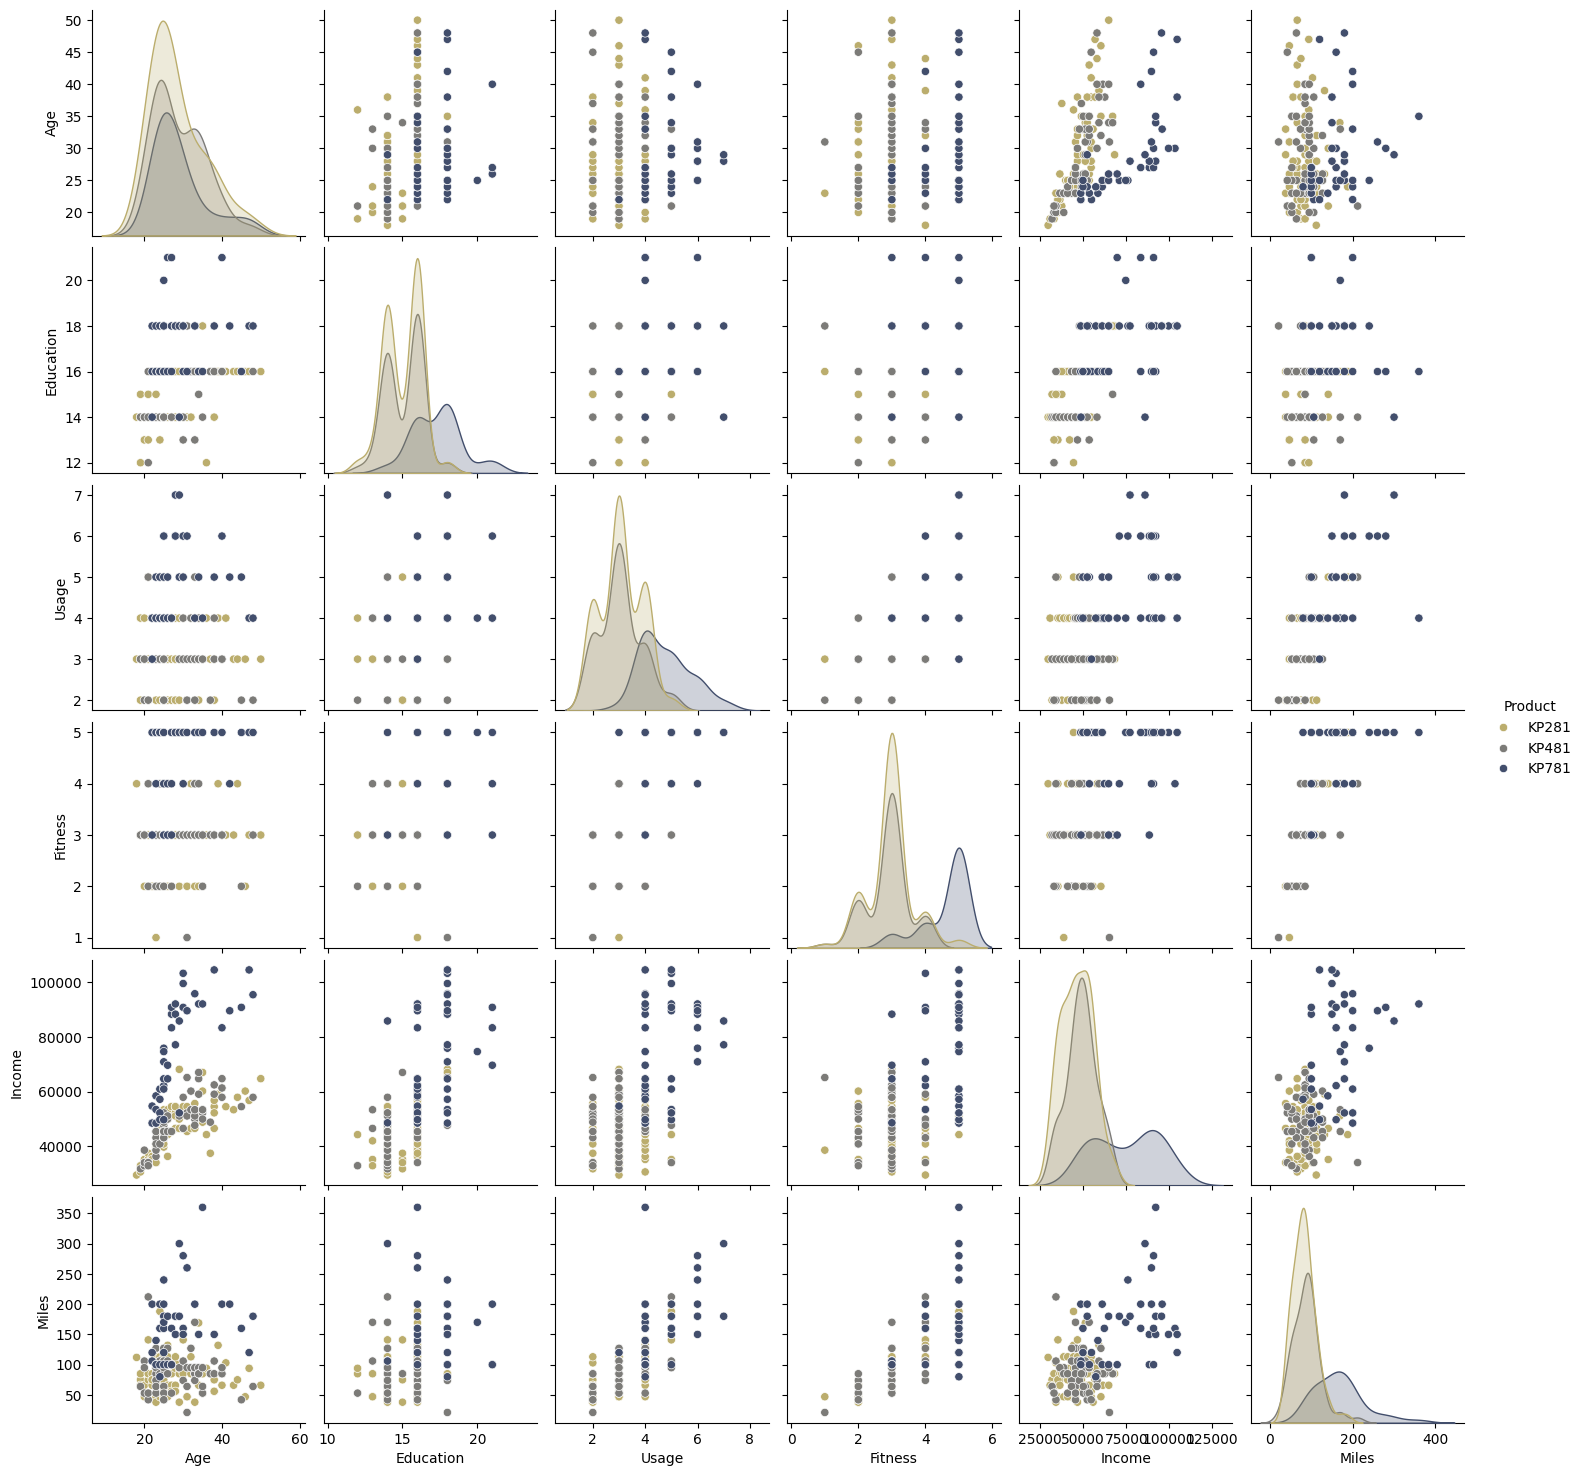

In [ ]:
sns.pairplot(data=df,hue='Product',palette='cividis_r')
plt.show()

Insights:

* we observe a positive correlation between Age and Income.
* Usage displays a strong correlation with Fitness and Miles, indicating that higher treadmill usage

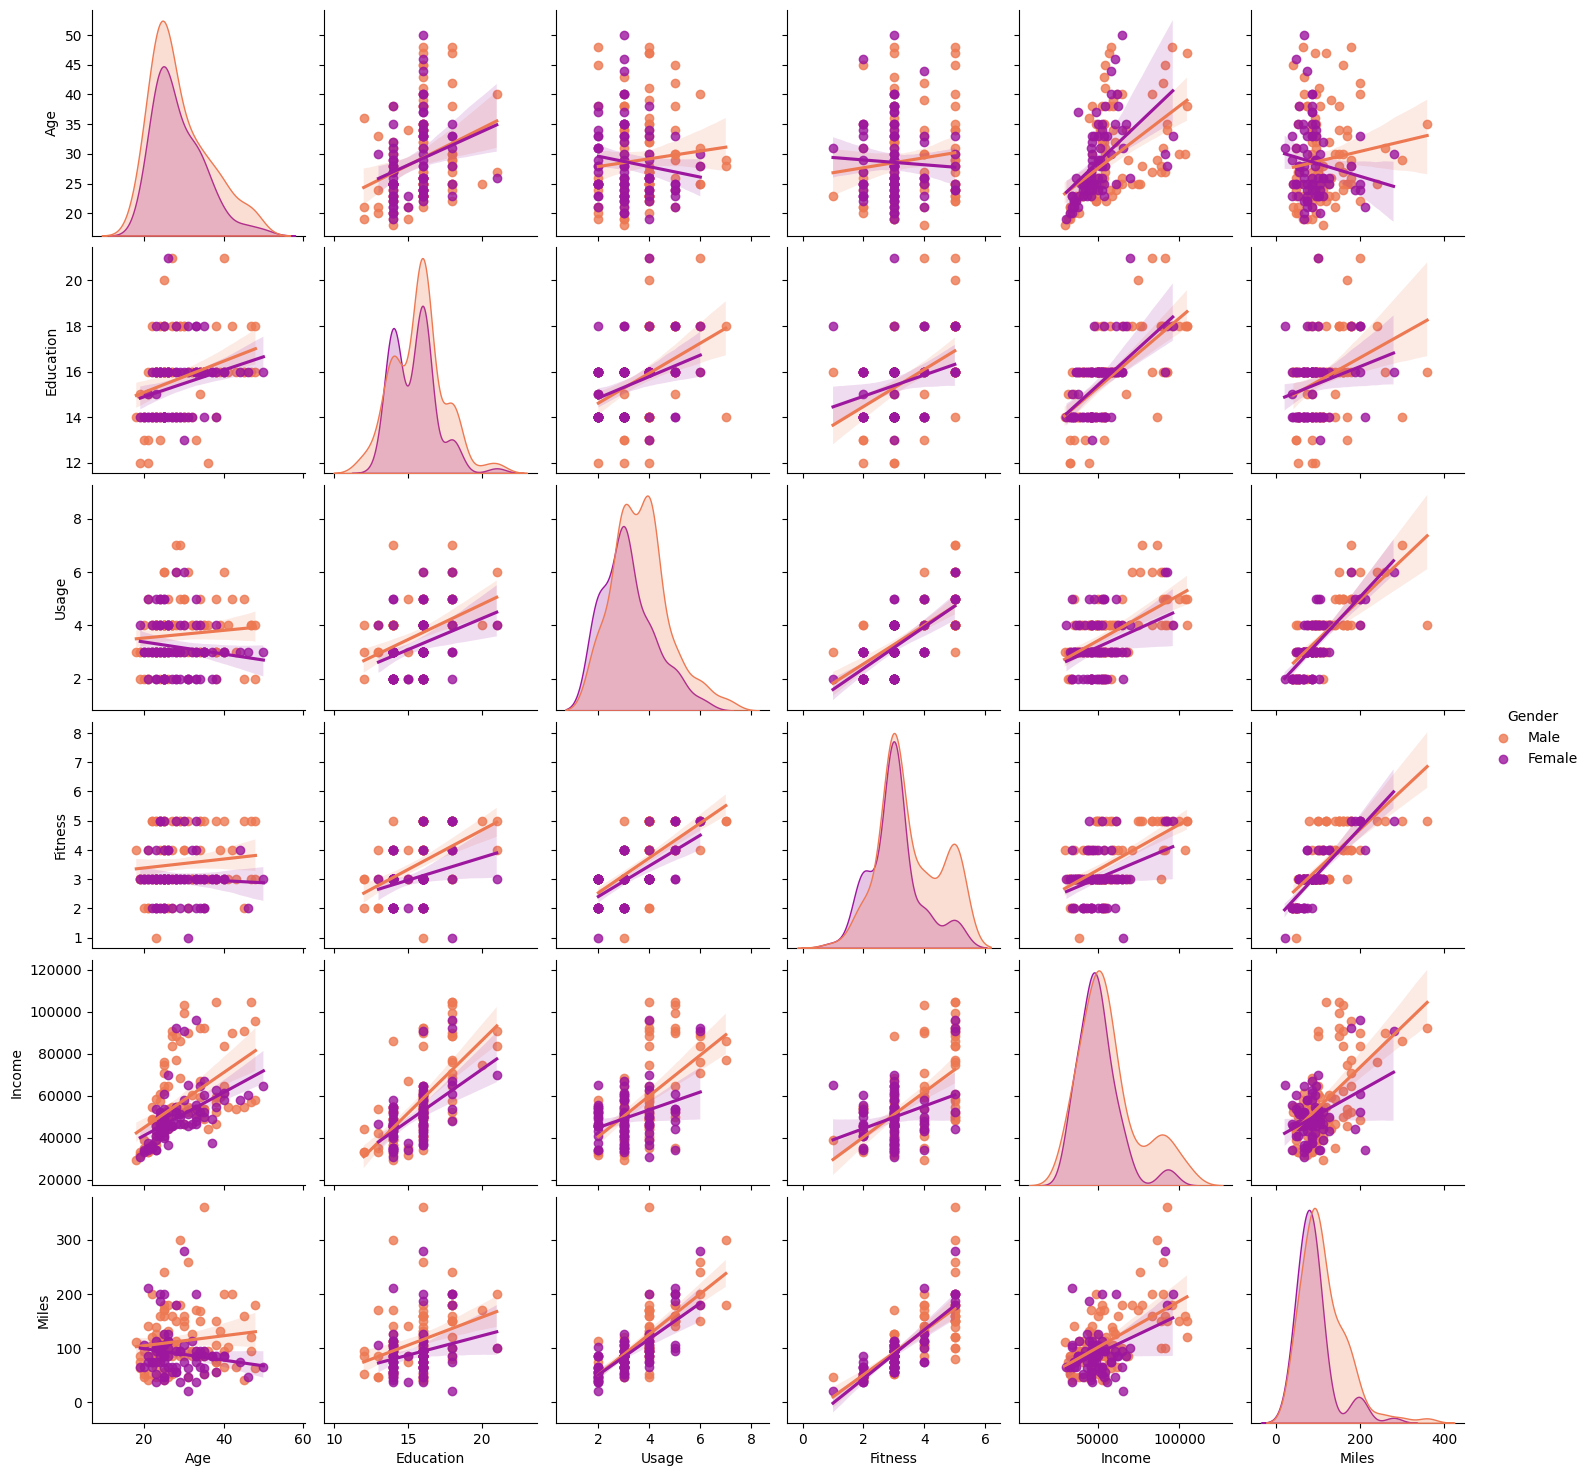

In [ ]:
sns.pairplot(data = df, palette='plasma_r', hue='Gender', kind='reg')
plt.show()

## **Correlation between Gender and Product**

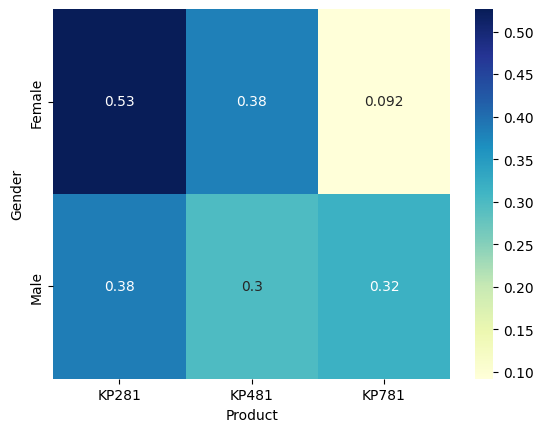

In [ ]:
sns.heatmap(pd.crosstab(df['Gender'], df['Product'], normalize='index'), annot=True, cmap='YlGnBu')
plt.show()

Insights:
1.   Probability of buying KP281 given that the customer is male, P(Product=KP281 | Customer=Male) = 0.38.
2.   Probability of buying KP481 given that the customer is male, P(Product=KP481 | Customer=Male) = 0.3.
3.   Probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 0.32.

1.   Probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 0.53.
2.   Probability of buying KP481 given that the customer is female, P(Product=KP481 | Customer=Female) = 0.38.
3.   Probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 0.092.



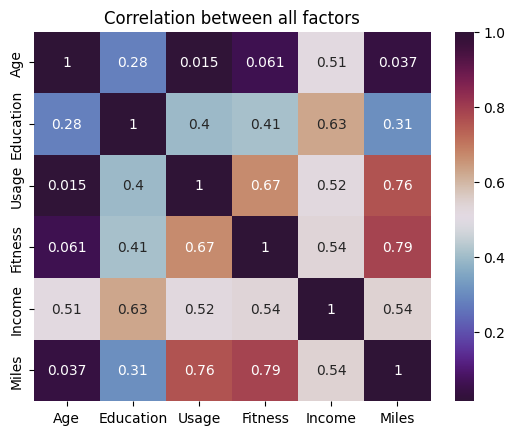

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap= "twilight_shifted", annot=True)
plt.title('Correlation between all factors')
plt.show()

Insights:

* Correlation between Age and Miles is 0.03
* Correlation between Education and Income is 0.63
* Correlation between Usage and Fitness is 0.67
* Correlation between Fitness and Age is 0.061
* Correlation between Income and Usage is 0.52
* Correlation between Miles and Age is 0.037
* A heat map plots rectangular data as a color-encoded matrix.
* Stronger the colour, stronger the correlation b/w the variables



---

# **6. Customer profiling and recommendation**


---



## **6.1] Customer profiling**

**6.1.1 Overview:**
 * Probability of purchasing KP281: 44%
 * Probability of purchasing KP481: 33%
 * Probability of purchasing KP781: 22%

**6.1.2 Customer Profile for KP281 Treadmill:**
 * Age: 18 to 35 years, with some aged 35 to 50
 * Education: 13 years and above
 * Income: Below
 * USD 60,000 annually
 * Usage: 2 to 4 times weekly
 * Fitness: Scale of 2 to 4
 * Miles: 50 to 100 miles per week

**6.1.3 Customer Profile for KP481 Treadmill:**

* Age: Mainly 18 to 35 years, with some aged 35 to 50
* Education: 13 years and above
* Income: Between USD 40,000 to USD 80,000 annually
* Usage: 2 to 4 times weekly
* Fitness: Scale of 2 to 4
* Miles: 50 to 200 miles per week

**6.1.4 Customer Profile for KP781 Treadmill:**
* Gender: Male
* Age: Primarily 18 to 35 years
* Education: 15 years and above
* Income: USD 80,000 and above annually
* Fitness: Scale of 3 to 5
* Miles: 100 miles and above per week


## **6.2. Recommendations**


 * KP281 and KP481 also brings in significant amount of revenue and is prefered mostly by youth , added
 features and specialized discounts could help boost sales.
 * Target the Age group above 40 years to recommend Product KP781.
 * Introduce entry-level pricing for KP281, mid-range pricing for KP481, and premium pricing for KP781
 * Offer package deals to add value and justify higher price points.
 * Host online sessions focusing on fitness topics tailored to different education levels
 * Showcase how treadmill models support various fitness goals.
 Offer package deals to add value and justify higher price points.
 * Target females and lower-income customers with campaigns emphasizing affordability and moderate
 exercise suitability.
 * we should run a marketing campaign on to encourage women to exercise more
 * Provide customer support and recommend users to upgrade from lower versions to next level versions
 after consistent usages.